In [1]:
import nibabel as nib
from nibabel.testing import data_path

import os
from pathlib import Path 

import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
class helper:
    def __init__(self):
        return
    

    def read_image(self, img_path):
        return nib.load(os.path.join(data_path, img_path)).get_fdata()
    

    def show_img(self, axis, sliceA, sliceB, img_path): 
        '''
            axis type -> axial, sagital or coronal,
            sliceA -> start point, 
            sliceB -> end point,
            n -> slice count
        '''
        img = self.read_image(img_path)                 
        print(f"Shape: {img.shape}")
        n = sliceB - sliceA

        # setting values to rows and column variables
        rows = int(np.ceil(np.sqrt(n)+1))
        cols = int(np.ceil(np.sqrt(n)))

        if(cols > 2):
            col_size = n * 1.25
            row_size = n * 2
        else:
            col_size = n * 1.5
            row_size = n * 3.2

        if axis == "axial":
            plot = figure(figsize=(col_size, row_size), dpi=77)
            for i in range(n):
                ax = plot.add_subplot(rows, cols, i + 1)
                ax.set_title(f'{sliceA + i}. Slice', fontsize= 11)
                ax.imshow(img[sliceA + i,:,:], cmap='gray')

        elif axis == "sagittal":
            plot = figure(figsize=(col_size, row_size), dpi=77)
            for i in range(n):
                ax = plot.add_subplot(rows, cols, i + 1)
                ax.set_title(f'{sliceA + i}. Slice', fontsize= 11)
                ax.imshow(img[:,:,sliceA + i], cmap='gray')

        elif axis == "coronal":
            plot = figure(figsize=(col_size, row_size), dpi=77)
            for i in range(n):
                ax = plot.add_subplot(rows, cols, i + 1)
                ax.set_title(f'{sliceA + i}. Slice', fontsize= 11)
                ax.imshow(img[:,sliceA + i,:], cmap='gray')
        
        else:    print("Wrong axis type!")
        plt.savefig(f'/Users/toygar/Desktop/Bitirme/data/figures/{axis}_{sliceA}_to_{sliceB}_stripped.pdf', bbox_inches="tight",
                pad_inches=0.3, transparent=False)
        plt.show()

In [3]:
h = helper()

In [4]:
path = '/Users/toygar/Desktop/Bitirme/data/'

# Understand the data

In [5]:
data = pd.read_csv(f'{path}ADNI1_Complete_3Yr_1.5T_1_22_2023.csv')

In [6]:
data

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I204843,941_S_1202,CN,M,81,m36,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/14/2010,NiFTI,12/10/2022
1,I137298,941_S_1202,CN,M,80,m24,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/17/2009,NiFTI,12/10/2022
2,I75150,941_S_1202,CN,M,78,m06,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/24/2007,NiFTI,12/10/2022
3,I105437,941_S_1202,CN,M,79,m12,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/28/2008,NiFTI,12/10/2022
4,I63874,941_S_1202,CN,M,78,sc,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,12/10/2022
...,...,...,...,...,...,...,...,...,...,...,...,...
2177,I40966,002_S_0295,CN,M,85,m06,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,11/02/2006,NiFTI,12/10/2022
2178,I118671,002_S_0295,CN,M,85,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled_2,Processed,4/18/2006,NiFTI,12/10/2022
2179,I64025,002_S_0295,CN,M,86,m12,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,5/25/2007,NiFTI,12/10/2022
2180,I123685,002_S_0295,CN,M,87,m24,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,7/23/2008,NiFTI,12/10/2022


## Subject Count?
Below subject counts are not right in terms of patient size. This problem happens because subjects are coming more than once through the process. Therefore, we have 5 to 7 3D images per subject in average.

In [7]:
data['Group'].value_counts()

MCI    981
CN     748
AD     453
Name: Group, dtype: int64

In [8]:
df = data.groupby(['Subject'])['Group'].describe()

In [9]:
df

,count,unique,top,freq
Subject,,,,
002_S_0295,7,1,CN,7
002_S_0413,7,1,CN,7
002_S_0619,5,1,AD,5
002_S_0685,6,1,CN,6
002_S_0729,7,1,MCI,7
...,...,...,...,...
137_S_0994,6,1,MCI,6
137_S_1041,4,1,AD,4
137_S_1414,6,1,MCI,6


## Actual count of patients

In [10]:
df['top'].value_counts()

MCI    148
CN     135
AD      99
Name: top, dtype: int64

In [11]:
subject_path = f'{path}skullstripped/hasta1.nii'

# How 3D images are distributed over anatomical axis

Example shape: (256, 256, 166)

First dim: 'axial'
Second dim: 'coronal'
Third dim: 'sagittal'

Shape: (256, 256, 166)


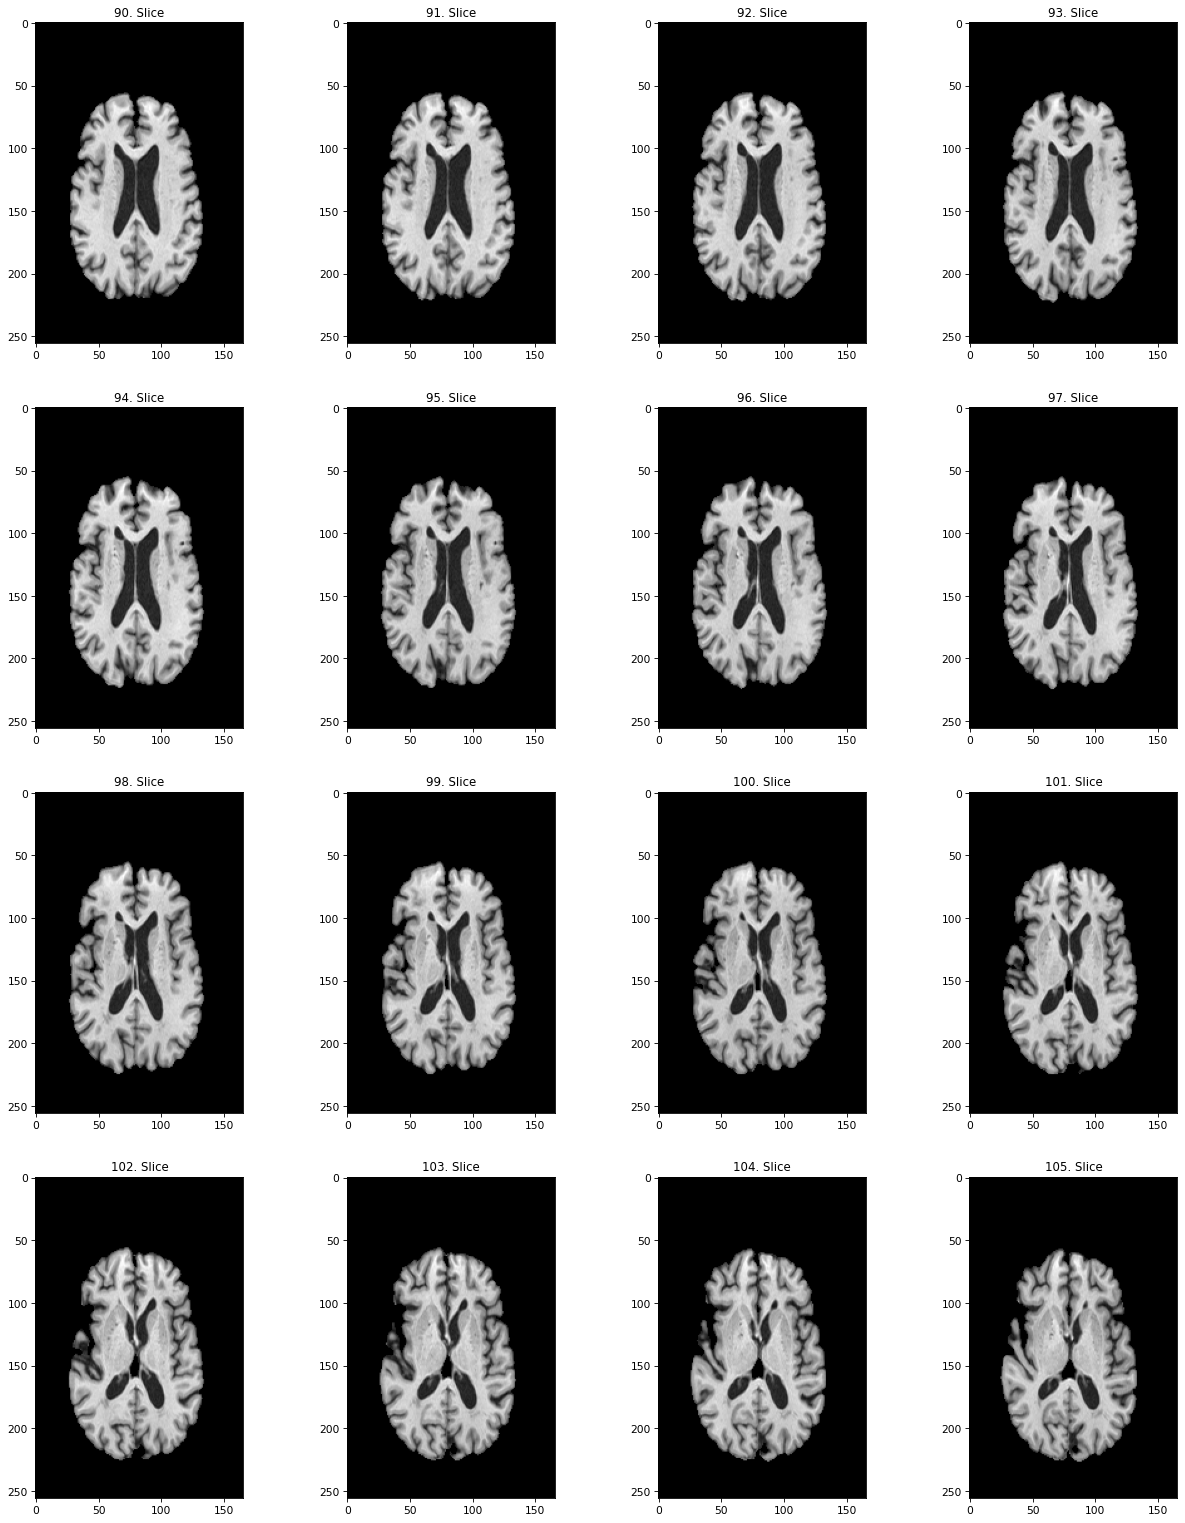

In [12]:
h.show_img('axial', 90, 106, subject_path)

Shape: (256, 256, 166)


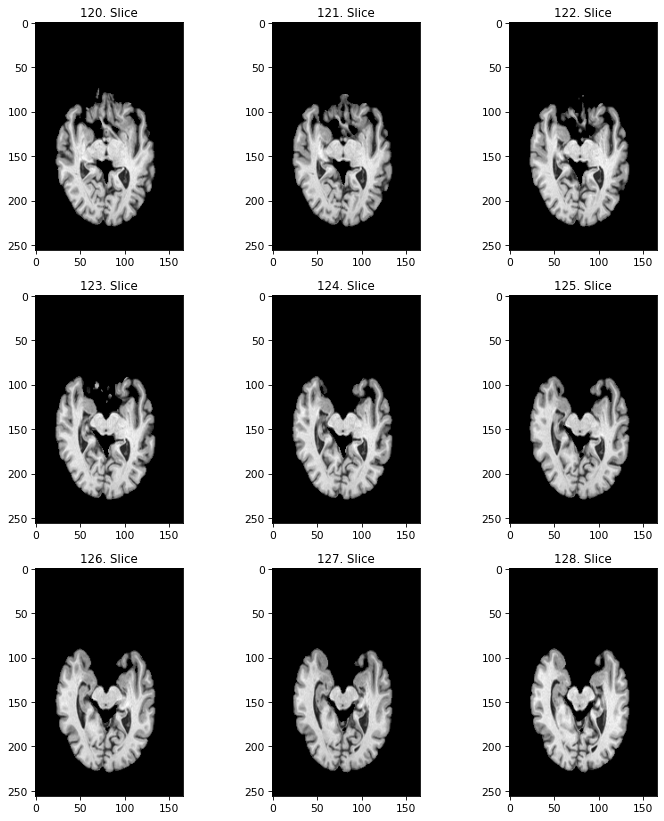

In [13]:
h.show_img('axial', 120, 129, subject_path)

Shape: (256, 256, 166)


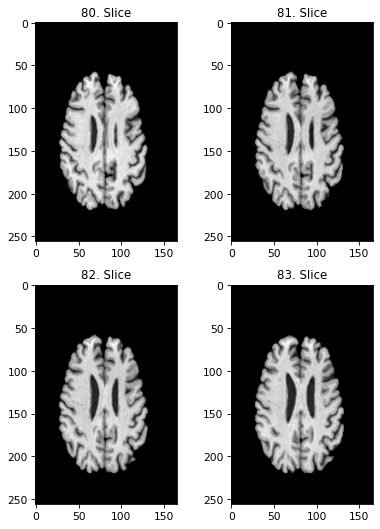

In [14]:
h.show_img('axial', 80, 84, subject_path)

Shape: (256, 256, 166)


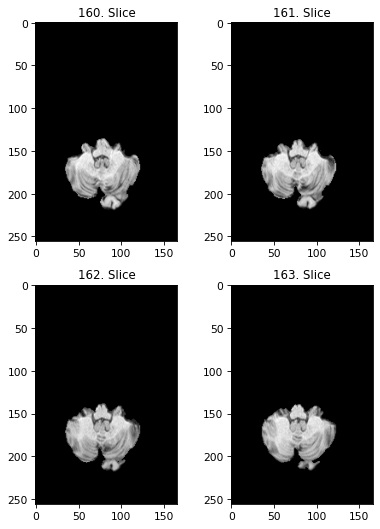

In [15]:
h.show_img('axial', 160, 164, subject_path)

Shape: (256, 256, 166)


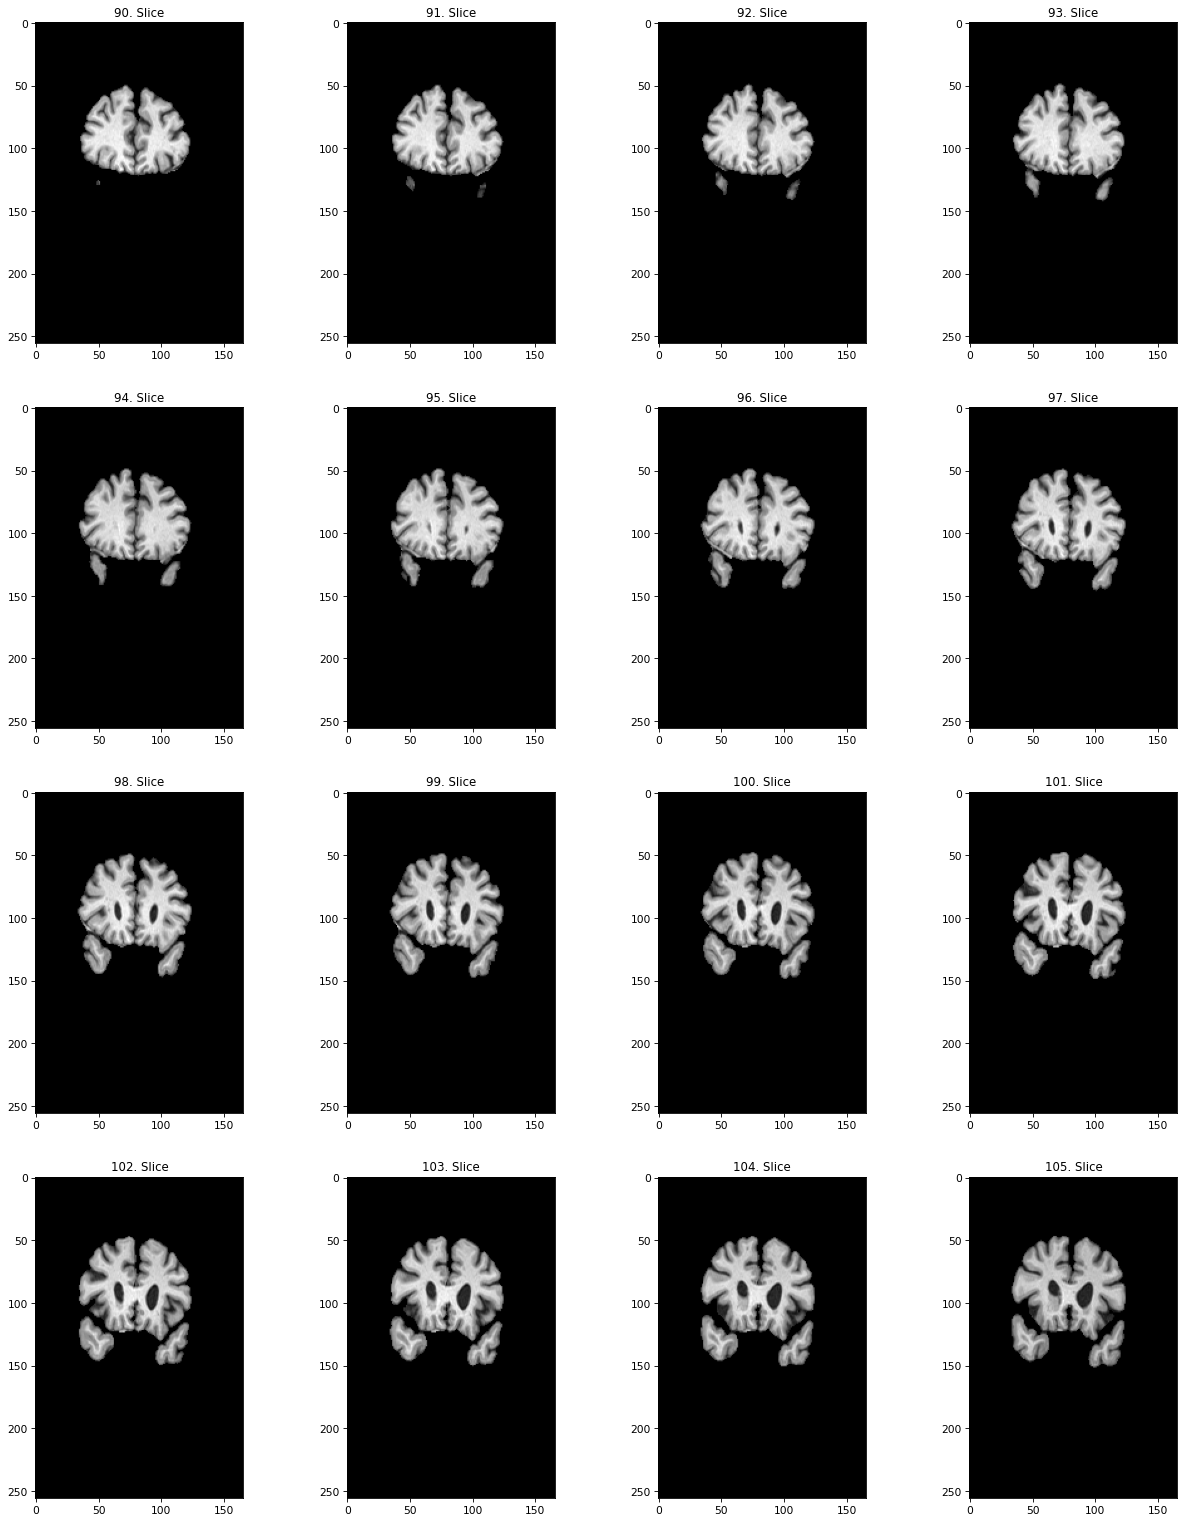

In [16]:
h.show_img('coronal', 90, 106, subject_path)

Shape: (256, 256, 166)


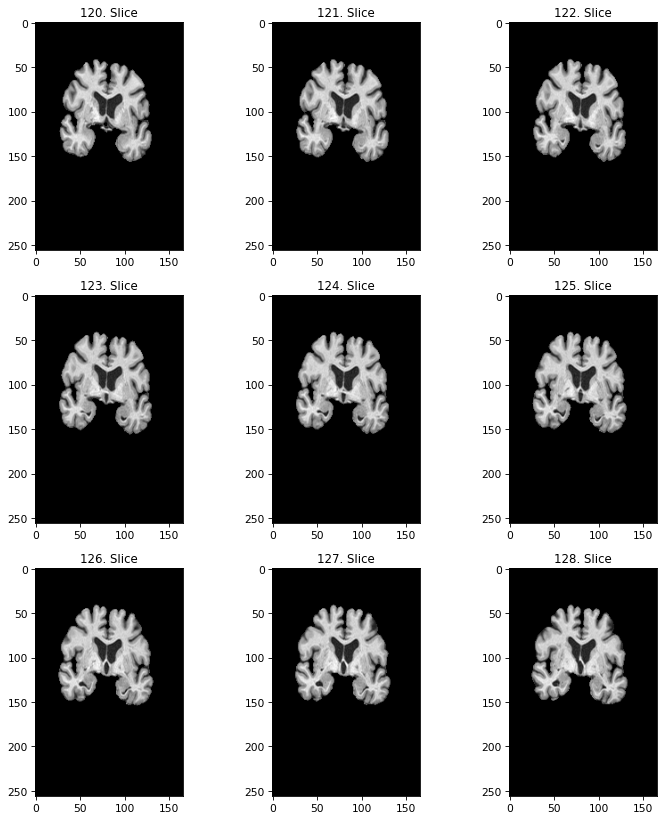

In [17]:
h.show_img('coronal', 120, 129, subject_path)

Shape: (256, 256, 166)


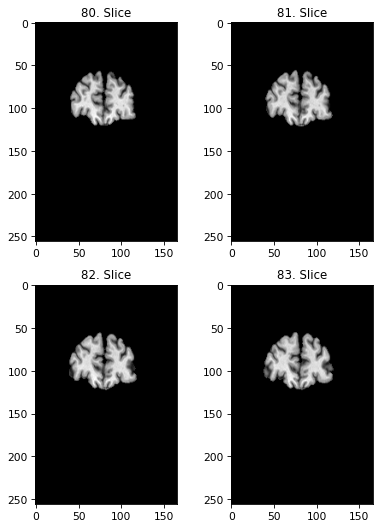

In [18]:
h.show_img('coronal', 80, 84, subject_path)

Shape: (256, 256, 166)


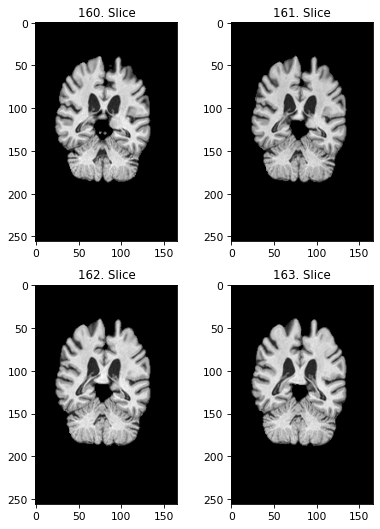

In [19]:
h.show_img('coronal', 160, 164, subject_path)

Shape: (256, 256, 166)


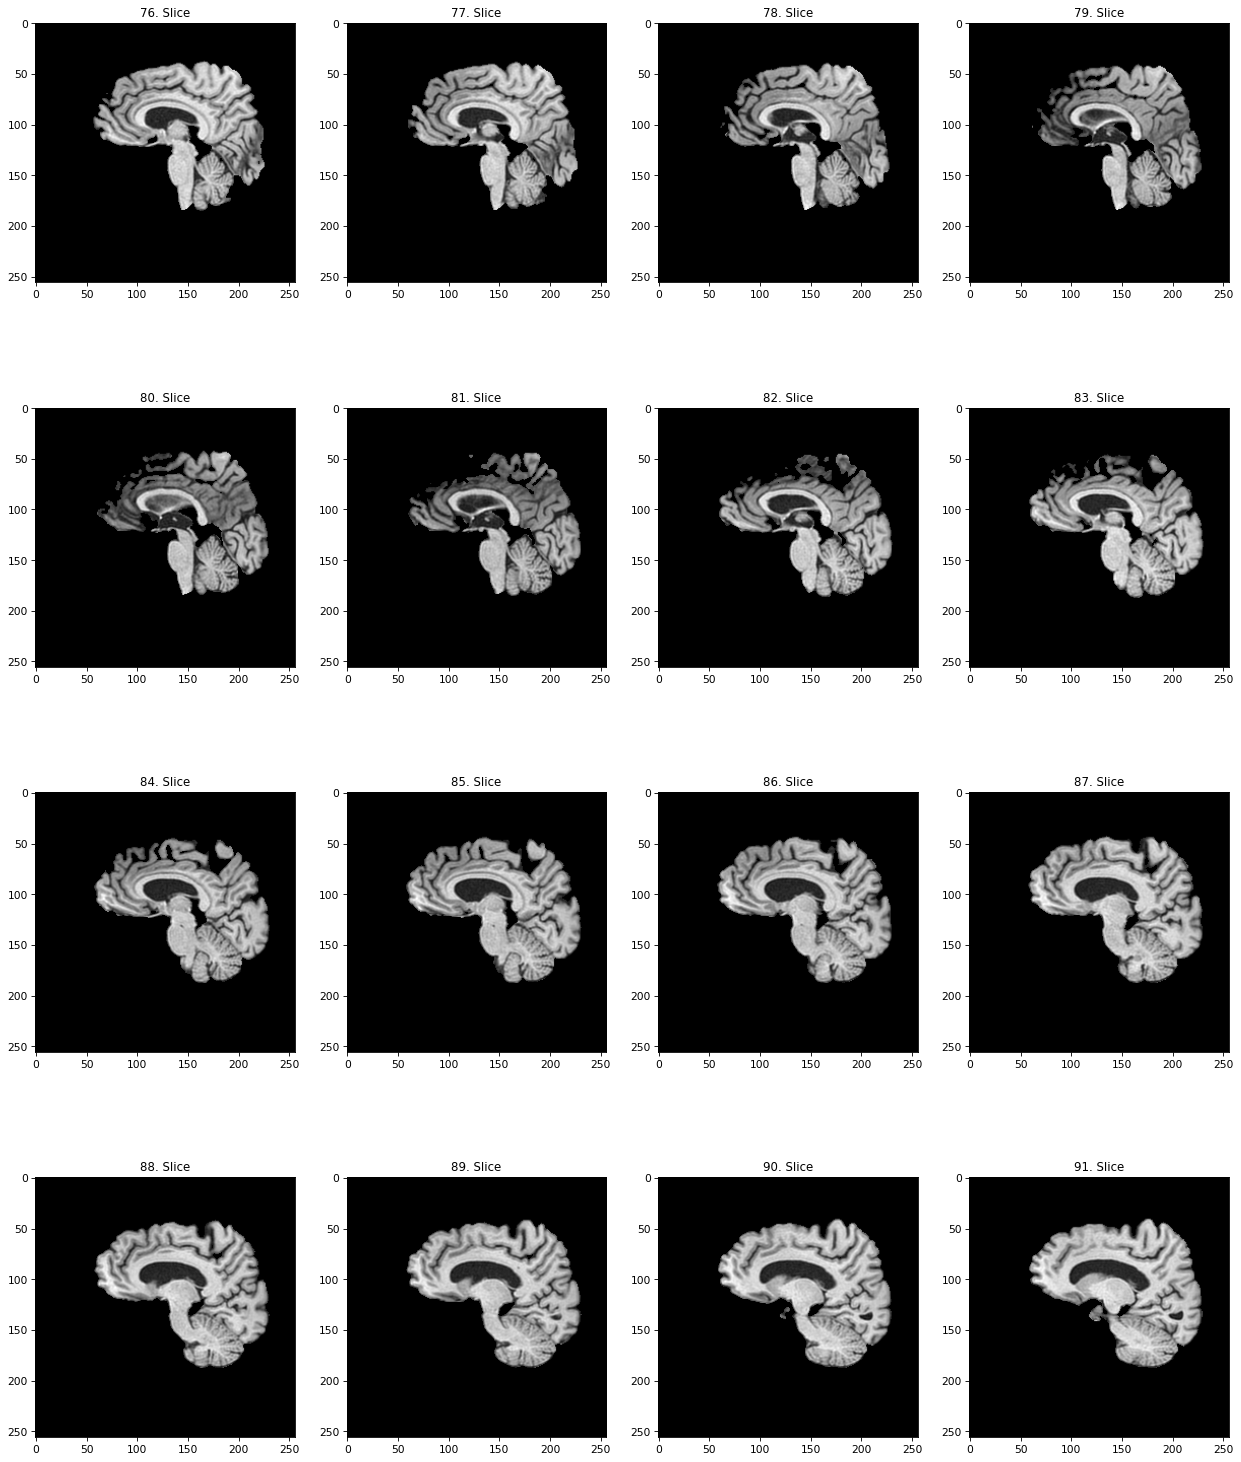

In [20]:
h.show_img('sagittal', 76, 92, subject_path)

Shape: (256, 256, 166)


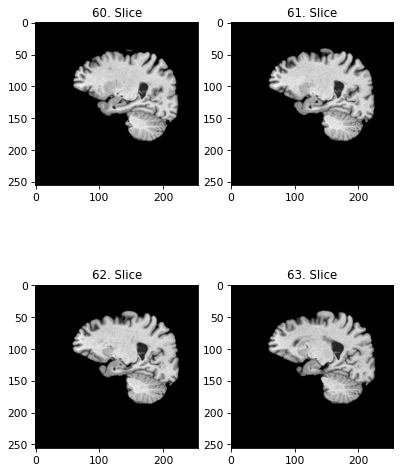

In [21]:
h.show_img('sagittal', 60, 64, subject_path)

Shape: (256, 256, 166)


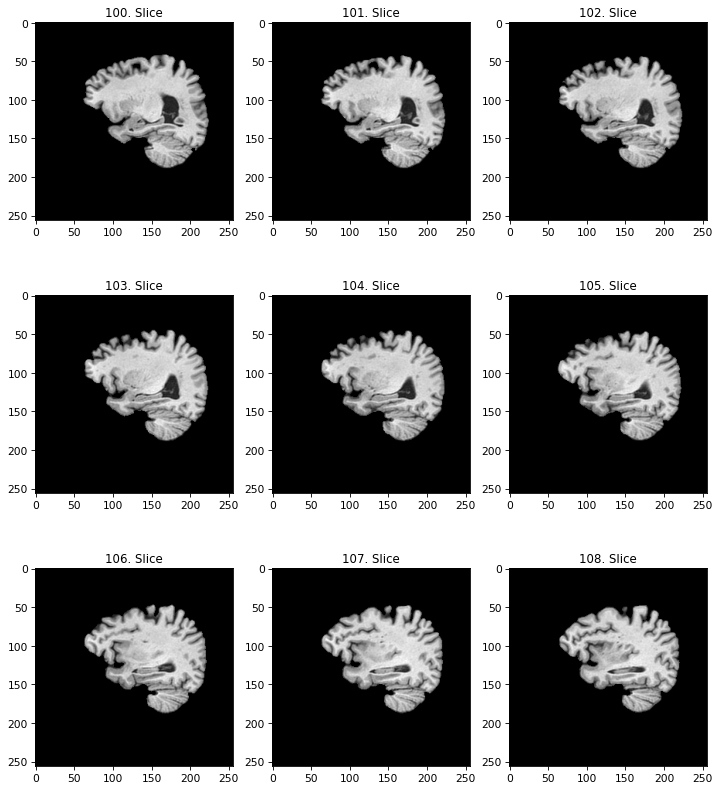

In [22]:
h.show_img('sagittal', 100, 109, subject_path)